В этой части проекта вам нужно написать несколько SQL-запросов в Jupyter Notebook. Эти задания проверят вручную, и вы получите комментарии к составленным запросам. 

Необходимые данные находятся в таблицах схемы `stackoverflow`. Не забудьте подключиться к базе с помощью SQLAlchemy. Вспомните инструкцию из [урока про представление результатов](https://practicum.yandex.ru/learn/data-analyst-plus/courses/96ccbf7a-b65d-4f51-b5f3-18360ad1e301/sprints/6116/topics/27f7c9a7-a474-4a82-8392-b3f069b26f69/lessons/e12d84bb-ffa8-490c-8bde-0935d86ceccb/). Пример кода для подключения к базе и выгрузки результатов вы найдёте и в этой тетрадке. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [5]:
db_config = {
    'user': '****8', # имя пользователя
    'pwd': '', # пароль
    'host': '****',
    'port': '****', # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [6]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', creation_date::date)::date AS month_date,
       SUM(views_count) AS total_views
FROM stackoverflow.posts 
WHERE DATE_PART('year', creation_date::date) = 2008
GROUP BY DATE_TRUNC('month', creation_date::date)
ORDER BY SUM(views_count) DESC
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 

In [7]:
sample_df

,month_date,total_views
0,2008-09-01,452928568
1,2008-10-01,365400138
2,2008-11-01,221759651
3,2008-12-01,197792841
4,2008-08-01,131367083
5,2008-07-01,669895


Text(0, 0.5, 'month_date')

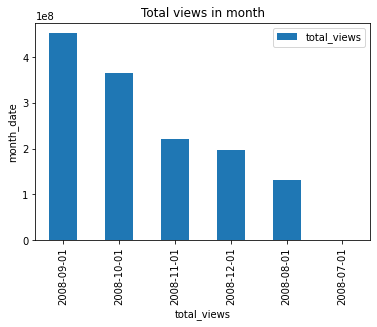

In [8]:
ax = sample_df.plot.bar(x='month_date', y='total_views')
ax.set_title('Total views in month')

ax.set_xlabel('total_views')
ax.set_ylabel('month_date')

Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

Изминения по месяцам очень резкие, скорее всего в данных имеется ошибка. Не думаю, что осенью у всех много вопросов по IT (в сравнении с другими месяцами), а в июле все в отпусках. 

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [9]:
query = '''
WITH tab AS (
SELECT u.display_name AS name, 
       u.id, 
       COUNT(*) OVER (PARTITION BY u.id) AS num_posts
FROM stackoverflow.users AS u
LEFT JOIN stackoverflow.posts p ON p.user_id = u.id 
LEFT JOIN stackoverflow.post_types AS t ON p.post_type_id = t.id
WHERE t.type = 'Answer' AND p.creation_date < (u.creation_date + INTERVAL '1 month')
)

SELECT name, 
       COUNT(name)
FROM tab
WHERE num_posts > 100
GROUP BY name
ORDER BY name
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 

In [10]:
sample_df

,name,count
0,1800 INFORMATION,101
1,Adam Bellaire,104
2,Adam Davis,126
3,Adam Liss,114
4,Amy B,133
...,...,...
57,leppie,110
58,lomaxx,108
59,mattlant,159
60,paxdiablo,117


In [7]:
#КОД РЕВЬЮЕРА
query = '''
WITH tab AS (
SELECT u.display_name AS name, 
       u.id AS id, 
       COUNT(*) OVER (PARTITION BY u.display_name) AS num_posts
FROM stackoverflow.posts p
JOIN stackoverflow.post_types t ON p.post_type_id = t.id
JOIN stackoverflow.users u ON u.id = p.user_id
WHERE DATE_TRUNC('day', p.creation_date) >= DATE_TRUNC('day', u.creation_date)
  AND DATE_TRUNC('day', p.creation_date) <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month'
  AND t.type = 'Answer'
)

SELECT name, 
       COUNT(DISTINCT id)
FROM tab
WHERE num_posts > 100
GROUP BY name
ORDER BY name
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 
sample_df

,name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


In [8]:
#КОД РЕВЬЮЕРА
query = '''
SELECT u.display_name,
       COUNT(DISTINCT user_id)
FROM stackoverflow.posts p
JOIN stackoverflow.post_types t ON p.post_type_id = t.id
JOIN stackoverflow.users u ON u.id = p.user_id
WHERE DATE_TRUNC('day', p.creation_date) >= DATE_TRUNC('day', u.creation_date)
  AND DATE_TRUNC('day', p.creation_date) <= DATE_TRUNC('day', u.creation_date) + INTERVAL '1 month'
  AND t.type = 'Answer'
GROUP BY u.display_name
HAVING COUNT(*) > 100
ORDER BY display_name;
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 
sample_df

,display_name,count
0,1800 INFORMATION,1
1,Adam Bellaire,1
2,Adam Davis,1
3,Adam Liss,1
4,Alan,8
...,...,...
74,lomaxx,1
75,mattlant,1
76,paxdiablo,1
77,tvanfosson,1


In [13]:
sample_df.sort_values('count', ascending=False)

,display_name,count
45,Matt,29
10,Chris,29
14,Dan,21
64,Tom,19
41,Mark,17
...,...,...
38,Lasse Vågsæther Karlsen,1
1,Adam Bellaire,1
40,Marc Gravell,1
42,Mark Cidade,1


<details>

<summary>Подсказка</summary>
Вам нужно присоединить несколько таблиц — изучите внимательнее описание базы. Чтобы добавить промежуток времени к дате, используйте ключевое слово INTERVAL, например, так: <дата> + INTERVAL '1 year 2 months 3 days'
.</details>

Какие аномалии наблюдаются в данных? О чём они говорят?

<div class="alert alert-info">
Простые имена (без фамилии) встречаются намного чаще, что логично, так как случаев совпадений имен и фамилий должно быть меньше, чем просто имен. 

Страно то что все имена одинаковые, наверное уникальность имени это условие регистрации. 

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [13]:
# напишите запрос
query = '''
SELECT DATE_TRUNC('month', p.creation_date::date)::date AS month,
       COUNT(*)
FROM stackoverflow.posts AS p
LEFT JOIN stackoverflow.users u ON p.user_id = u.id
WHERE DATE_TRUNC('month', u.creation_date::date) = '2008-09-01' AND user_id IN (SELECT DISTINCT user_id
                                                                              FROM stackoverflow.posts 
                                                                              WHERE DATE_TRUNC('month', creation_date::date) = '2008-12-01')
GROUP BY DATE_TRUNC('month', p.creation_date::date)::date
ORDER BY month DESC

'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 

In [14]:
sample_df

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые зарегистрировались в сентябре 2008 года и оставили хотя бы один пост в декабре. Затем используйте результат для среза и посчитайте посты по месяцам.</details>

Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

Страно, что имеются посты в августе, когда мы регистрировались в декабре. 

In [15]:
query = '''
SELECT p.creation_date AS date_post,
       u.creation_date AS date_user, 
       p.user_id, 
       COUNT(*) OVER (PARTITION BY p.user_id)
FROM stackoverflow.posts AS p
LEFT JOIN stackoverflow.users u ON p.user_id = u.id
WHERE DATE_TRUNC('month', u.creation_date::date) = '2008-09-01' AND DATE_TRUNC('month', p.creation_date::date) = '2008-08-01' AND user_id IN (SELECT DISTINCT user_id
                                                                              FROM stackoverflow.posts 
                                                                              WHERE DATE_TRUNC('month', creation_date::date) = '2008-12-01')
LIMIT 10
'''
sample_df = pd.read_sql_query(query, con=engine) 

In [16]:
sample_df

,date_post,date_user,user_id,count
0,2008-08-30 15:20:15,2008-09-03 10:48:17,4381,2
1,2008-08-30 15:27:35,2008-09-03 10:48:17,4381,2
2,2008-08-12 16:32:25,2008-09-01 00:00:00,31505,30
3,2008-08-31 14:27:32,2008-09-01 00:00:00,31505,30
4,2008-08-20 20:42:05,2008-09-01 00:00:00,31505,30
5,2008-08-12 14:39:20,2008-09-01 00:00:00,31505,30
6,2008-08-12 14:16:42,2008-09-01 00:00:00,31505,30
7,2008-08-12 13:15:47,2008-09-01 00:00:00,31505,30
8,2008-08-14 10:36:04,2008-09-01 00:00:00,31505,30
9,2008-08-13 14:03:39,2008-09-01 00:00:00,31505,30


У нас тут два путешественника во времени, может имеется возможность (либо была) написать пост до регистрации (и id сразу присваивался по ip до регистрации). А возможно с этих IP происходит тестирование сайта.

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [17]:
# напишите запрос
query = '''
SELECT user_id, 
       creation_date,
       views_count,
       SUM(views_count) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts
ORDER BY user_id, creation_date

'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 

In [18]:
sample_df

,user_id,creation_date,views_count,sum
0,1,2008-07-31 23:41:00,480476,480476
1,1,2008-07-31 23:55:38,136033,616509
2,1,2008-07-31 23:56:41,0,616509
3,1,2008-08-04 02:45:08,0,616509
4,1,2008-08-04 04:31:03,0,616509
...,...,...,...,...
243791,5696608,2008-12-23 16:00:37,0,2804
243792,5696608,2008-12-23 17:35:09,0,2804
243793,5696608,2008-12-24 01:02:48,0,2804
243794,5696608,2008-12-30 14:34:45,0,2804


<div class="alert alert-info"> 
Переделал запрос. 

<details>

<summary>Подсказка</summary>
Для подсчёта суммы с накоплением используйте оконную функцию.
</details>

# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [19]:
# напишите запрос
query = '''
WITH tab AS (
SELECT user_id,
       COUNT(*) AS total, 
       COUNT(DISTINCT creation_date::date) AS day_with_post
FROM stackoverflow.posts
WHERE DATE_TRUNC('month', creation_date) = '2008-08-01'
GROUP BY user_id
)

SELECT user_id, 
       CAST(total AS float) / day_with_post AS avg_daily
FROM tab
WHERE total > 120
ORDER BY avg_daily
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 

In [20]:
sample_df

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые написали более 120 постов за август. Используя этот запрос в качестве подзапроса для среза, найдите и сохраните во временную таблицу идентификаторы нужных пользователей, дни августа и количество постов в день. В основном запросе сгруппируйте данные по пользователям и найдите для каждого из них среднее количество постов.
</details>

# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [21]:
# напишите запрос
query = '''
WITH tab AS (
            SELECT CAST(COUNT( DISTINCT creation_date::date) AS float) AS total_posts
            FROM stackoverflow.posts
            WHERE creation_date::date BETWEEN '2008-12-01' AND '2008-12-7'
            GROUP BY user_id
            )
SELECT AVG(total_posts)::int
FROM tab
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 

In [22]:
sample_df

,avg
0,2


<details>

<summary>Подсказка</summary>
Посчитайте, сколько активных дней было у каждого пользователя. Добавьте данные во временную таблицу и используйте в основном запросе.
</details>

Проанализируйте итоговую таблицу — какие выводы можно сделать?

Из 7 дней пользователи взаимодействовали в среднем в двух днях,значит платформа востребованная.

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [23]:
# напишите запрос
query = '''
SELECT user_id,
       creation_date, 
       LAG(to_char(to_timestamp (DATE_PART('month', creation_date)::text, 'MM'), 'Month'), 2, NULL) OVER (PARTITION BY user_id ORDER BY creation_date)
FROM stackoverflow.posts
ORDER BY user_id, creation_date

'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 

In [24]:
sample_df

,user_id,creation_date,lag
0,1,2008-07-31 23:41:00,None
1,1,2008-07-31 23:55:38,None
2,1,2008-07-31 23:56:41,July
3,1,2008-08-04 02:45:08,July
4,1,2008-08-04 04:31:03,July
...,...,...,...
243791,5696608,2008-12-23 16:00:37,December
243792,5696608,2008-12-23 17:35:09,December
243793,5696608,2008-12-24 01:02:48,December
243794,5696608,2008-12-30 14:34:45,December


<details>

<summary>Подсказка</summary>
Преобразовать результат оконной функции в нужное значение вам поможет аналог условного оператора в SQL: CASE <поле> WHEN <старое значение> THEN <новое значение> END.
</details>

# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [25]:
# напишите запрос
query = '''
WITH tab AS (
SELECT DISTINCT user_id, 
       DATE_TRUNC('month', FIRST_VALUE(creation_date) OVER (PARTITION BY user_id ORDER BY creation_date)) AS reg,
       DATE_TRUNC('month', creation_date) AS month_date
FROM stackoverflow.posts 
),

tab1 AS (
SELECT reg, 
       COUNT(DISTINCT user_id) AS users_reg
FROM tab
GROUP BY reg
),

tab2 AS (
SELECT reg,
       month_date,
       COUNT(DISTINCT user_id) AS cnt
FROM tab
GROUP BY reg, month_date)

SELECT t2.reg,
       t2.month_date, 
       t2.cnt, 
       t1.users_reg, 
       t2.cnt * 100 / t1.users_reg AS retention_rate
FROM tab2 AS t2
LEFT JOIN tab1 AS t1 ON t2.reg = t1.reg


'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 
sample_df

,reg,month_date,cnt,users_reg,retention_rate
0,2008-07-01,2008-07-01,3,3,100
1,2008-07-01,2008-08-01,2,3,66
2,2008-07-01,2008-09-01,1,3,33
3,2008-07-01,2008-10-01,2,3,66
4,2008-07-01,2008-11-01,1,3,33
5,2008-07-01,2008-12-01,2,3,66
6,2008-08-01,2008-08-01,2151,2151,100
7,2008-08-01,2008-09-01,1571,2151,73
8,2008-08-01,2008-10-01,1275,2151,59
9,2008-08-01,2008-11-01,1050,2151,48


<details>

<summary>Подсказка</summary>
Вспомните, как выглядел запрос для расчёта Retention Rate в теории. Создайте две временные таблицы: `profile` и `sessions` (в ней будет информация о публикациях), а затем используйте их в основном запросе.

Во временной таблице `profile` вам понадобятся три поля:

- идентификатор пользователя;
- дата первого поста пользователя, усечённая до месяца (признак начала когорты);
- количество пользователей этой когорты.
</details>

Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

Text(0.5, 1.0, 'Percent retention_rate')

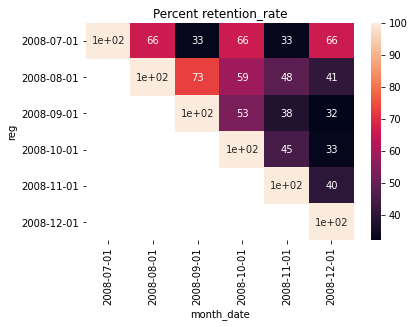

In [26]:
from seaborn import heatmap
sample_df[['reg', 'month_date']] = sample_df[['reg', 'month_date']].astype('str')
ax = heatmap(sample_df.pivot('reg', 'month_date', 'retention_rate'), annot=True)
ax.set_title('Percent retention_rate')

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [28]:
# напишите запрос
query = '''
WITH tab AS (
SELECT DATE_PART('month', creation_date)::int AS date,
       COUNT(*) AS post_month
FROM stackoverflow.posts
WHERE creation_date BETWEEN '2008-09-01' AND '2008-12-31'
GROUP BY DATE_PART('month', creation_date)
)

SELECT date, 
       post_month, 
       (CAST(post_month AS FLOAT) - LAG(post_month) OVER())*100 / post_month
FROM tab

'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 

In [29]:
sample_df = sample_df.set_index('date')

In [30]:
sample_df

,post_month,?column?
date,,
9,70371,NaN
10,63102,-11.519445
11,46975,-34.331027
12,44592,-5.344008


<details>

<summary>Подсказка</summary>
Эту задачу стоит декомпозировать. Сформируйте запрос, который отобразит номер месяца и количество постов. Затем можно использовать оконную функцию, которая вернёт значение за предыдущий месяц, и посчитать процент.
</details>

Постройте круговую диаграмму с количеством постов по месяцам.

Text(0.5, 1.0, 'Posts in month')

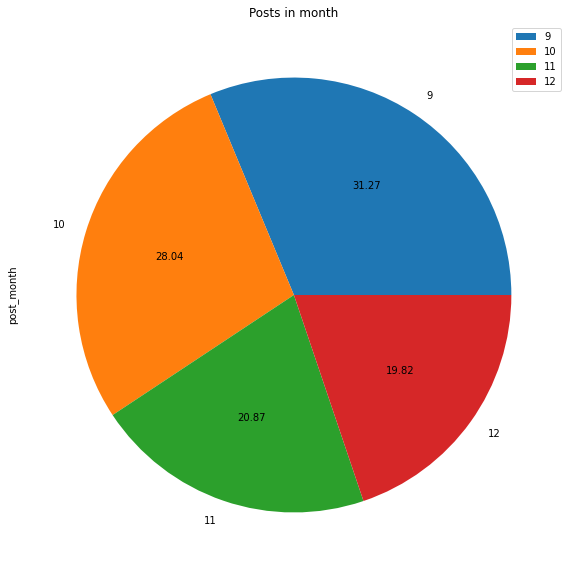

In [31]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

ax = sample_df.plot.pie(y='post_month', figsize=(10, 10), autopct=autopct)
ax.set_title('Posts in month')

<div class="alert alert-info"> Поменял

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [32]:
# напишите запрос
query = '''
WITH tab AS (
SELECT user_id, 
       COUNT(*)
FROM stackoverflow.posts
GROUP BY user_id
ORDER BY count DESC
LIMIT 1),

tab1 AS (
SELECT DATE_PART('week', creation_date)::int AS week, 
       creation_date AS date
FROM stackoverflow.posts
WHERE user_id IN (SELECT user_id
                   FROM tab) AND DATE_TRUNC('month', creation_date) = '2008-10-01'
)

SELECT DISTINCT week, 
       MAX(date) OVER (PARTITION BY week)
FROM tab1
ORDER BY week

'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 
sample_df

,week,max
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01


У меня вопрос, почему не 'LAST_VALUE(date) OVER (PARTITION BY week ORDER BY date)' не работает так как 'MAX(date) OVER (PARTITION BY week)'? Мы же создаем окно основываясь на значениях week и сортируем данные внутри окна опираясь на данные из date, разве нет? 

In [33]:
query = '''
WITH tab AS (
SELECT user_id, 
       COUNT(*)
FROM stackoverflow.posts
GROUP BY user_id
ORDER BY count DESC
LIMIT 1),

tab1 AS (
SELECT DATE_PART('week', creation_date)::int AS week, 
       creation_date AS date
FROM stackoverflow.posts
WHERE user_id IN (SELECT user_id
                   FROM tab) AND DATE_TRUNC('month', creation_date) = '2008-10-01'
)

SELECT DISTINCT week, 
       LAST_VALUE(date) OVER (PARTITION BY week ORDER BY date)
FROM tab1
ORDER BY week
'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 
sample_df

,week,last_value
0,40,2008-10-01 05:23:11
1,40,2008-10-01 06:21:00
2,40,2008-10-01 06:35:08
3,40,2008-10-01 09:16:35
4,40,2008-10-01 10:59:31
...,...,...
435,44,2008-10-31 17:41:20
436,44,2008-10-31 20:22:25
437,44,2008-10-31 20:50:12
438,44,2008-10-31 21:54:56


In [34]:
#КОД РЕВЬЮЕРА
query = '''
WITH f AS
(SELECT user_id
FROM stackoverflow.posts
GROUP BY user_id
ORDER BY COUNT(id) DESC
LIMIT 1)

SELECT DISTINCT(EXTRACT(WEEK FROM creation_date)) AS week_creation,
       LAST_VALUE(creation_date) OVER(ORDER BY (EXTRACT(WEEK FROM creation_date))) AS creation_date
FROM stackoverflow.posts
WHERE user_id IN (SELECT user_id FROM f) AND  DATE_TRUNC('month', creation_date) = '2008-10-01'

'''

# выполните запрос
sample_df = pd.read_sql_query(query, con=engine) 
sample_df

,week_creation,creation_date
0,40.0,2008-10-05 08:16:26
1,41.0,2008-10-12 21:22:23
2,42.0,2008-10-19 06:49:30
3,43.0,2008-10-26 20:51:12
4,44.0,2008-10-31 22:16:01


<details>

<summary>Подсказка</summary>
Декомпозируйте задачу:
1) Найдите пользователя, который опубликовал больше всего постов. 2) Найдите дату и время создания каждого поста этого пользователя и номер недели. 
3) Отобразите данные только о последних постах пользователя. Для этого можно использовать оконную функцию.
</details>